# Chapter 1: Analysing Returns, VaR, and CVaR

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats 
import edhec_risk_kit as erk

%load_ext autoreload
%autoreload 2
%matplotlib inline

# using seaborn style (type plt.style.available to see available styles)
plt.style.use("seaborn-pastel")  

### Returns

Definition of simple (price) **return**: how much we gain (or loose) from the price at time $t+1$ and the price at time $t$. 
That is:

$$
R_{t,t+1} := \frac{P_{t+1} - P_t}{P_{t}} = \frac{P_{t+1}}{P_t} - 1. 
$$


### Compound return

In general, given a time frame $(t, t+k)$, with $k>1$:
$$
R_{t,t+k} = (1+R_{t,t+1})(1+R_{t+1,t+2})\cdots(1+R_{t+k-1,t+k}) - 1.
$$

If the returns are the same over all time periods, say $R$, for the entire given time frame $(t, t+k)$, with $k>1$, 
then the compound returns becomes simply
$$
R_{t,t+k} = (1+R)^{k} - 1.
$$

### Return per year (or annualized return)


**In general**:
$$
R_{py} = (1 + R)^{P_{y}} - 1,
\quad\text{where}\quad
P_{y} =
\begin{cases}
&252  & \text{if $R$ is daily return},\\
&52   & \text{if $R$ is weekly return},\\
&12  & \text{if $R$ is monthly return}
\end{cases}
$$
The variable $P_y$ is called **periods_per_year**.


### Volatility (or risk)

The **volatility** of an asset is simply the standard deviation of the returns of the asset:
$$
\sigma := \sqrt{  \frac{1}{N-1} \sum_{t} (R_t - \mu)^2  },
$$
where $R_t$ is our series of returns at time $t$ and $\mu$ is the sample mean of the returns, i.e., $\mu := \frac{1}{N}\sum_{t}R_t$, 
with $N$ denoting the number of returns.

### Adjusting the volatility

Suppose that we have **monthly** returns and we compute the volatily of our asset, that is, we compute the **monthly volatility**. 
What if we want to know the **volatility over the year?** 
It is clear that we cannot compare the volatility obtained from data corresponding to different time scales. 
The way to proceed is the following:
$$
\sigma_{ann} = \sigma_{p} \sqrt{p},
$$
where $\sigma_{ann}$ is the **annualized volatility**, or volatility per year, whereas $p$ stands for the period considered 
and $\sigma_p$ the corresponding computed volatility. 

For example:

1) In case of **monthly** returns with volatility $\sigma_m$, we compute the annualized volatility 
by doing $\sigma_{ann}=\sigma_m\sqrt{12}$;

2) In case of **weekly** returns with volatility $\sigma_w$, we compute the annualized volatility 
by doing $\sigma_{ann}=\sigma_w\sqrt{52}$;

3) In case of **daily** returns with volatility $\sigma_d$, we compute the annualized volatility 
by doing $\sigma_{ann}=\sigma_d\sqrt{252}$.

### Return on risk 

This is a measure to obtain **how much reward (return) do we get from our the investment in some asset per unit of risk** (volatility). 
By definition, this is simply the ratio between the return and the volatility:
$$
\text{ROR} := \frac{\text{RETURN}}{\text{RISK}} = \frac{R}{\sigma}, 
$$
where RETURN is the total (compound) return over the period under consideration. 
Let us compute the RORs for the two stocks in the example above.

### Sharpe Ratio
The **sharpe ratio** is defined as:
$$
\lambda := \frac{E_R}{\sigma}
\quad\text{where}\quad
E_R := R - R_F, 
$$
where $E_R$ is called the **excess return** which is therefore nothing but that the return $R$ minus a **benchmark (risk-free) return**.

### Example

In [2]:
ffme = erk.get_ffme_returns()
ffme.head()

,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


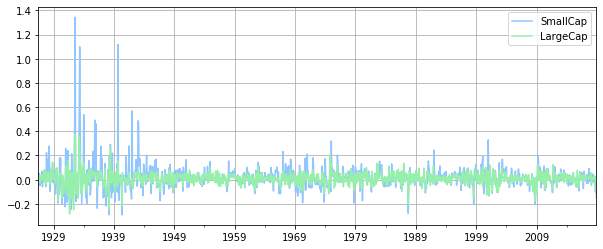

In [3]:
ffme.plot(grid=True, figsize=(10,4))
plt.show()

In [4]:
# compute the volatility
vol = ffme.std()
vol

SmallCap    0.106288
LargeCap    0.053900
dtype: float64

Note that this is the **monthly** volatility since we have monthly data. Compute the annualized volatility:

In [5]:
annualized_vol = vol * np.sqrt(12)
annualized_vol

SmallCap    0.368193
LargeCap    0.186716
dtype: float64

Now, we want to compute the **return per month**. We need the total numbers of months of the entire timeframe (from 1926 to 2018), which is simply the number of rows of the dataframe. Then we can use the formula for the return per month:

In [6]:
nmonths = ffme.shape[0]
total_return = (1 + ffme).prod() - 1
return_per_month = (1 + total_return)**(1/nmonths) - 1
return_per_month

SmallCap    0.012986
LargeCap    0.007423
dtype: float64

Now compute the **return per year** (**annualized return**) by using either the return per month or using the total return.

In [7]:
# return-per-year: using the formula with return per month and power 12
annualized_return = (1 + return_per_month)**12 - 1
print( annualized_return ) 

# which is the same as:
# return-per-year: using the formula with total return and power 12/no. of months  
#annualized_return = (1 + total_return) ** (12/nmonths) - 1
#print( annualized_return ) 

SmallCap    0.167463
LargeCap    0.092810
dtype: float64


Compute the **ROR and sharpe ratios**:

In [8]:
ROR = annualized_return / annualized_vol
ROR

SmallCap    0.454825
LargeCap    0.497063
dtype: float64

This would suggest to invest in Large caps (Hi 10) due to higher return per unit of risk. However:

In [9]:
# define a risk free rate
risk_free_rate = 0.03
excess_return  = annualized_return - risk_free_rate
sharpe_ratio   = excess_return / annualized_vol
sharpe_ratio

SmallCap    0.373346
LargeCap    0.336392
dtype: float64

In in case of a hypothetical risk-free rate of $3\%$, then we get higher sharpe ratio for Small Caps (Lo 10)$\dots$

In [10]:
excess_return

SmallCap    0.137463
LargeCap    0.062810
dtype: float64

### Drawdown

The Drawdown is defined as the **worst return** we could have experienced if we entered and left the market at the worst possible points. (e.g. Buy at the highest, Sell at the lowest). 
It measures **potential losses**, and therefore it is a **downside risk measure**.

In order to compute the drawdon of the two indices we do the following steps


From EDHEC's note:

1. Compute the so-called **wealth index**, i.e., the value of the portfolio as it compounds over times. That is, given the series of returns, it is the series of compound returns at each time frame (using *cumprod()* method) 
2. Compute previous peaks
3. Compute the **drawdown**, i.e., the wealth values as a percentage of previous peaks


The **drawdown** is simply the difference of the wealth index from the (last) max peak, that is:
1. wealth_index - previous_peaks  (*in absolute values*)
2. (wealth_index - previous_peaks) / previous_peaks (*in percentage*)

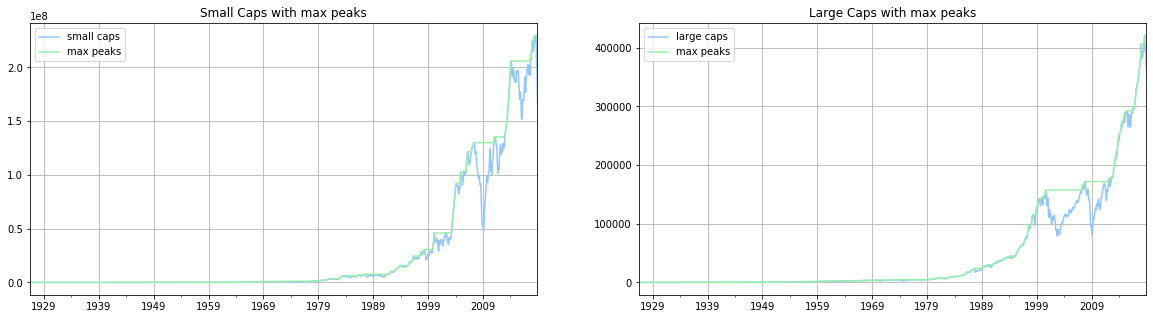

In [11]:
# we start from $100 and see how they evolve according to the returns
wealth_index = 100 * (1 + ffme).cumprod()
wealth_index.head()

f, ax = plt.subplots(figsize=(20,5), nrows=1, ncols=2)
# Plot of the wealth indices
wealth_index["SmallCap"].plot(grid=True, ax=ax[0], label="small caps", legend=True)
wealth_index["LargeCap"].plot(grid=True, ax=ax[1], label="large caps", legend=True )
# Using the cummax() method we can compute the cumulative max (peaks) throughout the series
previous_peaks = wealth_index.cummax()
previous_peaks["SmallCap"].plot(title="Small Caps with max peaks", grid=True, ax=ax[0], label="max peaks", legend=True)
previous_peaks["LargeCap"].plot(title="Large Caps with max peaks", grid=True, ax=ax[1], label="max peaks", legend=True)
plt.legend()
plt.show()

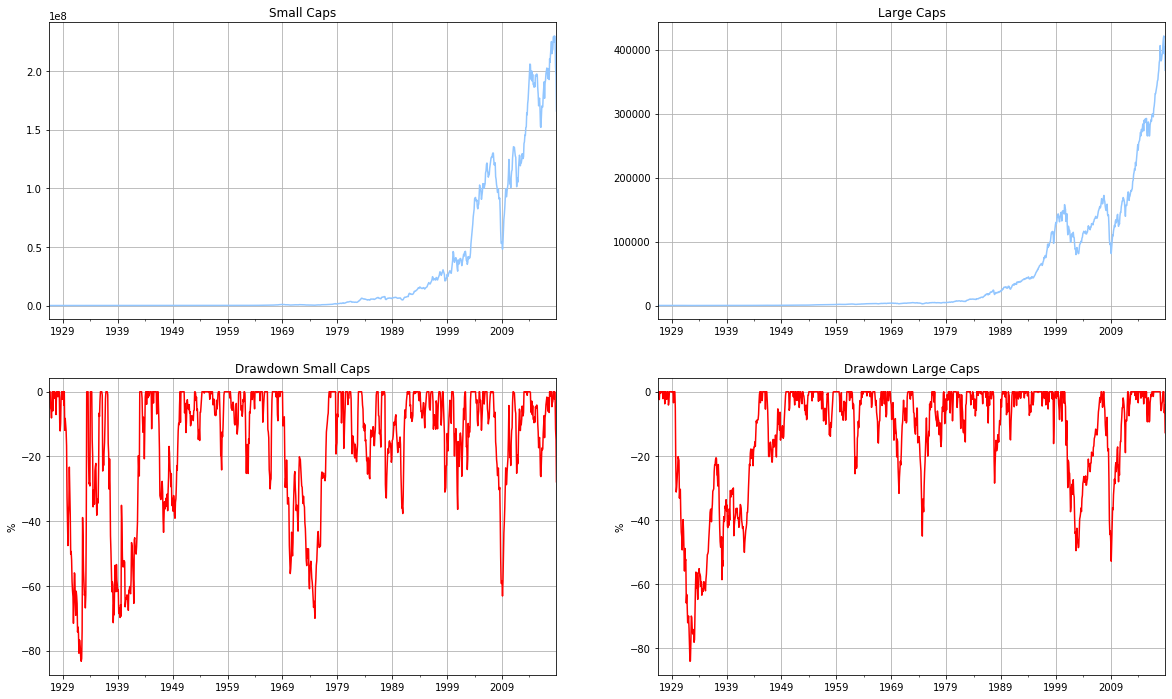

In [12]:
f, ax = plt.subplots(2,2,figsize=(20,12))
# Plot of the wealth indices
wealth_index["SmallCap"].plot(grid=True, title="Small Caps", ax=ax[0,0]) 
wealth_index["LargeCap"].plot(grid=True, title="Large Caps", ax=ax[0,1]) 

drawdown = (wealth_index - previous_peaks) / previous_peaks
(drawdown["SmallCap"]*100).plot(grid=True, title="Drawdown Small Caps", ax=ax[1,0], color='r')
(drawdown["LargeCap"]*100).plot(grid=True, title="Drawdown Large Caps", ax=ax[1,1], color='r')
ax[1,0].set_ylabel("%")
ax[1,1].set_ylabel("%")
plt.show()

For example, we see that after the '29 crisis there has been a loss of over $80\%$ of wealth for those people investing in Large Caps:

In [13]:
print("'29 crisis: ")
print( "{}%" .format( drawdown.min().round(2)*100) )
print("Date max drawdown:")
print( drawdown.idxmin() )

'29 crisis: 
SmallCap   -83.0
LargeCap   -84.0
dtype: float64%
Date max drawdown:
SmallCap    1932-05
LargeCap    1932-05
dtype: period[M]


The other two large drawdowns occured during the **dot com** crisis a the beginning of the new century and due to the **Lehman Brothers** crisis:

In [14]:
print("Dot Com crisis: ")
print( "{}%" .format( drawdown["1990":"2005"].min().round(2)*100) )
print("Date max drawdown:")
print( drawdown["1990":"2005"].idxmin() )

Dot Com crisis: 
SmallCap   -38.0
LargeCap   -50.0
dtype: float64%
Date max drawdown:
SmallCap    1990-12
LargeCap    2002-09
dtype: period[M]


In [15]:
print("Lehman Brothers crisis: ")
print( "{}%" .format( drawdown["2005":].min().round(2)*100) )
print("Date max drawdown:")
print( drawdown["2005":].idxmin() )

Lehman Brothers crisis: 
SmallCap   -63.0
LargeCap   -53.0
dtype: float64%
Date max drawdown:
SmallCap    2009-02
LargeCap    2009-02
dtype: period[M]


### Skewness and Kurtosis 

The **skewness** is a measure of the asymmetry of the probability distribution of a real-valued random variable 
about its mean. It **can be positive or negative, or undefined**.
For a unimodal distribution, **negative skewness commonly indicates that the fat tail is on the left side of the distribution**, and positive skewness indicates that the fat tail is on the right. 

The formal definition involves the third centered moment:
$$
S(X) := \frac{\mathbb{E}([X - \mu]^3)}{\sigma^3},
$$
where $\sigma$ is the standard deviation of $X$.

The **kurtosis** is a measure of the **tailedness** of the probability distribution of a real-valued random 
variable, that is, it is a descriptor of the shape of a probability distribution. 
The formal definition involves the fourth centered moment:
$$
K(X) := \frac{\mathbb{E}([X - \mu]^4)}{\sigma^4},
$$
where $\sigma$ is the standard deviation of $X$. Basically, Kurtosis is **the average of the standardized data raised to the fourth power**. Any standardized values that are less than 1 (i.e., data within one standard deviation of the mean, which is where we observe the "peak"), contribute virtually nothing to kurtosis, since raising a number that is less than 1 to the fourth power makes it closer to zero. The only data values (observed or observable) that contribute to kurtosis in any meaningful way are those outside the region of the peak; i.e., the outliers. Therefore, **kurtosis measures outliers only**, saying nothing about the peak.


**If $X$ is a Gaussian random variable we have $S(X) = 0$ and $K(X)=3$.**

In particular, the **Excess Kurtosis** is defined as Kustosis minus 3, in order to provide a comparison to the normal distribution.

#### Examples

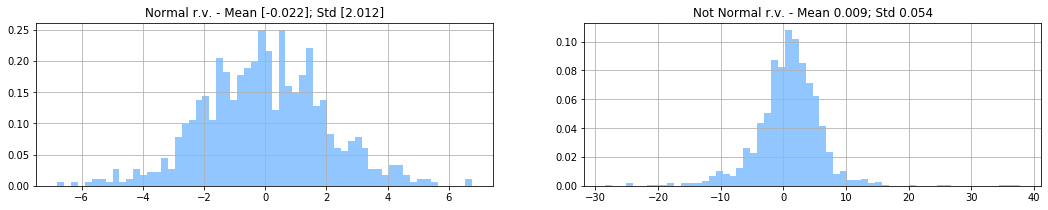

In [16]:
# Normal distributed random variable with mean 0 and std 2
A = pd.DataFrame( {"A" : np.random.normal(0, 2, size=800)} )

# Returns from FF dataset, that we know that are NOT normally distributed
B = erk.get_ffme_returns()
B = B["LargeCap"]

f = plt.figure(figsize=(18,3))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax1.hist( A.values ,bins=60, density=True )
ax1.set_title('Normal r.v. - Mean {}; Std {}' .format(A.mean().values.round(3),A.std().values.round(3)))
ax1.grid()

ax2.hist( B.values * 100 ,bins=60, density=True )
ax2.set_title('Not Normal r.v. - Mean {}; Std {}' .format(np.round(B.mean(),3), np.round(B.std(),3) ))
ax2.grid()

From the plot of the distributions, we can see that for the not normal random variables, we have a kind of symmetry, **but tails are fatters**. 
We then expect **the skewness to be close to zero** whereas the **kurtosis to be higher than $3$**.

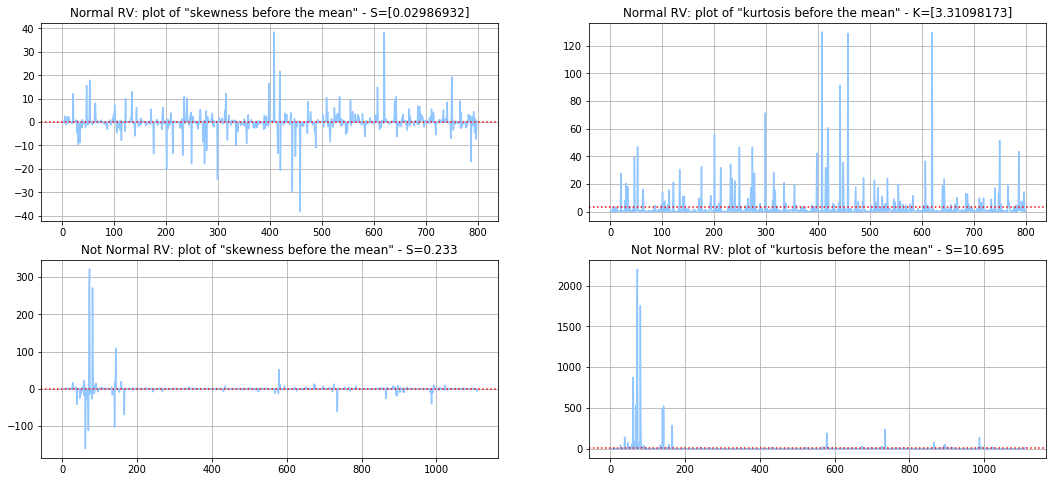

In [17]:
# Skewness of A and B
S_A = ( (A - A.mean())**3 / A.std(ddof=0)**3 ).mean() 
K_A = ( (A - A.mean())**4 / A.std(ddof=0)**4 ).mean() 

S_B = ( (B - B.mean())**3 / B.std(ddof=0)**3 ).mean()
K_B = ( (B - B.mean())**4 / B.std(ddof=0)**4 ).mean()

f = plt.figure(figsize=(18,8))
ax1 = f.add_subplot(221)
ax2 = f.add_subplot(222)
ax3 = f.add_subplot(223)
ax4 = f.add_subplot(224)

ax1.plot( ((A - A.mean())**3 / A.std(ddof=0)**3).values  )
ax1.set_title('Normal RV: plot of "skewness before the mean" - S={}' .format(S_A.values) )
ax1.axhline(y=S_A[0], linestyle=":", color="red")
ax1.grid()

ax2.plot( ((A - A.mean())**4 / A.std(ddof=0)**4).values  )
ax2.set_title('Normal RV: plot of "kurtosis before the mean" - K={}' .format(K_A.values) )
ax2.axhline(y=K_A[0], linestyle=":", color="red")
ax2.grid()

ax3.plot( ((B - B.mean())**3 / B.std(ddof=0)**3).values  )
ax3.set_title('Not Normal RV: plot of "skewness before the mean" - S={}' .format(np.round(S_B,3)) )
ax3.axhline(y=S_B, linestyle=":", color="red")
ax3.grid()

ax4.plot( ((B - B.mean())**4 / B.std(ddof=0)**4).values  )
ax4.set_title('Not Normal RV: plot of "kurtosis before the mean" - S={}' .format(np.round(K_B,3)) )
ax4.axhline(y=K_B, linestyle=":", color="red")
ax4.grid()

Let us load another dataset corresponding to **hedge fund indices**:

In [18]:
hfi = erk.get_hfi_returns()
hfi.head(3)

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077


In [19]:
hfi_skew_kurt = pd.DataFrame(columns=["Skewness","Kurtosis"])

# Compute the skewness and kurtosis of the returns in hfi using the pandas aggregate method, 
# which takes in input a function and applies the function to every column of the given dataframe

# compute the skewness
hfi_skew_kurt["Skewness"] = hfi.aggregate( erk.skewness )

# compute the kurtosis
hfi_skew_kurt["Kurtosis"] = hfi.aggregate( erk.kurtosis )

hfi_skew_kurt

,Skewness,Kurtosis
Convertible Arbitrage,-2.639592,23.280834
CTA Global,0.173699,2.952960
Distressed Securities,-1.300842,7.889983
Emerging Markets,-1.167067,9.250788
Equity Market Neutral,-2.124435,17.218555
Event Driven,-1.409154,8.035828
Fixed Income Arbitrage,-3.940320,29.842199
Global Macro,0.982922,5.741679
Long/Short Equity,-0.390227,4.523893
Merger Arbitrage,-1.320083,8.738950


Which index has, more or less, a Gaussian distribution? It seems that **CTA Global** has a skewnesss close to zero and kurtosis close to 3. 

We can use a test, called **Jarque-Bera test** from **scipy** which is implemented in our erk toolkit.

In [20]:
# For example:
print( scipy.stats.jarque_bera( hfi["CTA Global"] ) )
print( erk.is_normal( hfi["CTA Global"] ) )

(1.3467529104392226, 0.5099837302620382)
True


In [21]:
#while:
print( scipy.stats.jarque_bera( hfi["Convertible Arbitrage"] ) )
print( erk.is_normal(  hfi["Convertible Arbitrage"] ) )

(4812.703130094962, 0.0)
False


The second value is the so-called **p value** which is the one to look at to see if the returs are normally distributed. 
By default, if this value is larger than $0.01$, then the answer is true, or if you want, the series of returns passes the test.

In [22]:
hfi.aggregate( erk.is_normal )

Convertible Arbitrage     False
CTA Global                 True
Distressed Securities     False
Emerging Markets          False
Equity Market Neutral     False
Event Driven              False
Fixed Income Arbitrage    False
Global Macro              False
Long/Short Equity         False
Merger Arbitrage          False
Relative Value            False
Short Selling             False
Funds Of Funds            False
dtype: bool

We see that only the CTA GLobal index of returns passes the test, i.e., it seems to be normally distributed.

## Downside risk measures

### Semivolatility (or semideviation)

The **semivolatility** is the volatility of the portion of the return dataset which are negative.


**We rather concern about the volatility of negative returns**. Therefore, the definition is given by:
$$
\sigma_{semi} := \sqrt{ \frac{1}{N_{semi}} \sum_{R_t < 0} (R_t - \mu_{semi})^2 },
$$
where $\mu_{semi}$ is the sample mean of the negative returns and $N_{semi}$ is the number of these negative returns. 

Note that the definition can be applied to the returns which are **below the mean**, not necessarily at the negative ones.

In [23]:
# Computing the semivolatility (for negative returns) implemented in erk
erk.semideviation( hfi )

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

### Value at Risk (VaR)

It represents the **maximum expected loss** over a certain time period. 
First of all, we specify a certain confidence **level**, in $(0,1)$, although it is typically expressed in percentage. 

For example consider a $99\%$ level (i.e., $\alpha=0.99$). When we say **$99\%$ monthly VaR** it means that we are looking at the **worst possibile outcome over a month after excluding the $1\%$ of extreme worst losses**. In other words, what is **the maximum loss that you can take with $99\%$ of probability  over one month**.

**Example:** we are given the following set of monthly returns:
$$
R = (-4\%, +5\%, +2\%, -7\%, +1\%, +0.5\%, -2\%, -1\%, -2\%, +5\%).
$$
**What is the $90\%$ monthly VaR?** 

So what we have to do is 1) to exclude the $10\%$ worst returns and 2) looking at the worst return of the remaining ones. 
Since we have $10$ returns, the $10\%$ worse return is just $1$ return, i.e., $-7\%$, and so the worse return of the remaing ones is $-4\%$. 
Then $\text{VaR} = 4\%$.

**NOTE THAT although the value we find was $-4\%$ we say that $\text{VaR} = 4\%$, i.e., the VaR is typically a positive number.**


Mathematically, the VaR is defined as follow. Given the confidence level $\alpha\in(0,1)$,
$$
\text{VaR}_{\alpha}
:= - \text{inf}\{x\in\mathbb{R} \;:\; \mathbb{P}(R \leq x) \geq 1-\alpha \} 
= - \text{inf}\left\{x\in\mathbb{R} \;:\;  \mathbb{P}(R \geq x) \leq \alpha\right\},  
$$
that is, it is nothing but that the **$(1-\alpha)$-quantile** since we effectively want to find the number $\text{VaR}_\alpha$ such that 
$$
\mathbb{P}( R \leq -\text{VaR}_\alpha) = 1-\alpha,
$$
which says that there is a $(1-\alpha)\%$ probability of having a (negative) return greater or equal to $-\text{VaR}_\alpha$.

In previous example, the $90\%$ monthly VaR equal to $4\%$, means that 
$$
0.04 = \text{VaR}_{0.9} = -\text{inf}\{x\in\mathbb{R} \;:\; \mathbb{P}(R \leq x) \geq 0.01 \},
$$
i.e., there is a $10\%$ probability of loosing more than $4\%$ of our money invested (having monthly returns less than -$4\%$). 

### Conditional VaR (or Beyond VaR)

This is defined as the expected loss **beyond** VaR, or more formally, we look at **the average of the distribution beyond the VaR**, that is of those returns which are less than the VaR. Mathematically, this is going to be:
$$
\text{CVaR} := - \mathbb{E}( R | R<-\text{VaR}) = - \frac{\int_{-\infty}^{-\text{VaR}} t f_R(t)dt }{F_R(-\text{Var})},
$$
where $f_R$ is the density function of our returns and $F_R$ is the cumulative distribution function. 

**Example:** we are given the following set of monthly returns:
$$
R = (-4\%, +5\%, +2\%, -7\%, +1\%, +0.5\%, -2\%, -1\%, -2\%, +5\%).
$$
**What is the $80\%$ monthly CVaR?** 

So what we have to do is 1) excluding the $20\%$ worse returns and 2) looking at the worse return of the remaining ones and in this way we find $\text{VaR}_{0.8}$. 3) Then, we take the average of the returns which are less than $\text{VaR}_{0.8}$. 

Since we have $10$ returns, the $20\%$ worse return are $2$ returns, $-7\%$ and $-4\%$. The worse return among the remaining ones is $-2\%$. That is, $\text{VaR}_{0.8} = 2\%$. Now, we see that the returns less than $-\text{VaR}_{0.8}=-2\%$ are only $-7\%$ and $-4\%$. 
Their average is $\text{CVAR}_{0.8} = - (-7\%-4\%)/2 = 5.5\%$.

### Methods for estimating VaR and CVaR
We have the following methods:

#### Historical method (non parametric)
This is the most intuitive one which works by simply applying the definition of VaR as $(1-\alpha)$-quantile of the distribution of the returns of the asset under consideration. For example, consider the hedge fund indices returns:

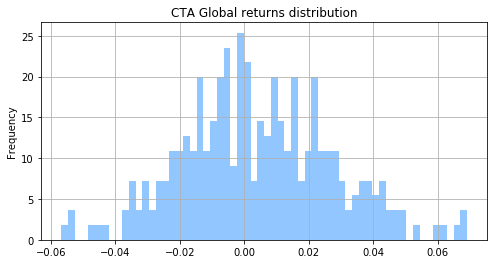

In [24]:
# get the CTA global returns
hfi = erk.get_hfi_returns()

# ...and plot their distribution
ax = hfi["CTA Global"].plot.hist(figsize=(8,4), bins=60, density=True)
ax.set_title("CTA Global returns distribution")
ax.grid()

We want to get the $90\%$, $95\%$, and $99\%$ monthly VaR. 
That is, we have levels $1-\alpha=0.01, 0.05, 0.01$. We can use the *percentile* method.

In [25]:
alpha = np.array([0.90, 0.95, 0.99])
level = 1 - alpha

# In the percentile method, we multiply by 100 because it wants an input between 0 and 100
VaRs = -np.percentile(hfi["CTA Global"], level*100)

print("90% Var: {:.2f}%".format(VaRs[0] * 100))
print("95% Var: {:.2f}%".format(VaRs[1] * 100))
print("99% Var: {:.2f}%".format(VaRs[2] * 100))

90% Var: 2.41%
95% Var: 3.17%
99% Var: 4.95%


It means that there is a $10\%$, $5\%$, $1\%$ probability that any given month we can loose at least about $2.4\%$, $3\%$, and $5\%$, respectively. 

Or, alternatively, that **there is a $90\%$, $95\%$, $99\%$ probability that for any given month we loose less than $2.4\%$, $3\%$, and $5\%$, respectively.**

It is worth saying that this way of computing VaR is, however, sensitive to the timescale of our returns, 
because a VaR computed using monthly returns will be different from a VaR computed using weekly returns$\dots$

#### Parametric method (Gaussian)
Here, we **assume that the returns are normally distributed**, which is, however, **often incorrect**. 

Let $\mu$ and $\sigma$ be the mean and the volatility of the returns $R$ and suppose that $R\sim N(\mu,\sigma)$. 
Via standardization, we can express $R$ as $R = \mu + X \sigma$, where $X\sim N(0,1)$. 
This way, **for computing $\text{VaR}_\alpha$, i.e. the $(1-\alpha)$-quantile of the distribution of $R$, we can compute the $(1-\alpha)$-quantile of the stardard normal distribution**. 

By definition of $\text{VaR}_\alpha$ and quantiles, we want to find the number $z_\alpha$ such that 
$$
\mathbb{P}(R \leq z_\alpha) = 1-\alpha.
$$
Hence we would have:
$$
1-\alpha = \mathbb{P}(R \leq z_\alpha) = \mathbb{P}(\mu+ X\sigma \leq z_\alpha) 
= \mathbb{P}\left(X \leq \frac{z_\alpha-\mu}{\sigma}\right) 
= \Phi\left( \frac{z_\alpha-\mu}{\sigma} \right)
\qquad\Longrightarrow\qquad
z_\alpha = \mu + \Phi^{-1}(1-\alpha)\sigma 
$$
Hence, we have found:
$$
\text{VaR}_\alpha = -\left(\;\mu + \Phi^{-1}(1-\alpha) \sigma\;\right),
$$
where $\Phi^{-1}(1-\alpha)$ is the $(1-\alpha)$-quantile of the Gaussian distribution that we can find using the *norm.ppf*, 
and $\mu$ and $\sigma$ are the mean and volatility of our returns series, respectively 
(here, recall that we put a minus since we want the VaR to be a positive number).

In [26]:
# Compute the 95% monthly Gaussian VaR of the hedge fund indices 
alpha = 0.95
erk.var_gaussian( hfi, level=(1-alpha)*100)

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

#### Cornish-Fisher method (semi parametric)

This is a modification of the parametric Gaussian method. The method uses the **Cornish-Fisher expansion (1937) of quantiles** which basically relates the $\alpha$-quantilies of **non Gaussian** distribution with the $\alpha$-quantiles of the Gaussian distribution 
in the following way:
$$
\tilde{z}_\alpha 
= z_\alpha + \frac{1}{6}(z_\alpha^2 - 1)S 
+ \frac{1}{24}(z_\alpha^3 - 3 z_\alpha)(K-3) 
- \frac{1}{36}(2z_\alpha^3 - 5 z_\alpha)S^2
$$
where $\tilde{z}_\alpha$, $S$, and $K$ denote the $\alpha$-quantile, the skewness, and the kurtosis of the the non Gaussian distribution (say, our returns series), respectively, and $z_\alpha$ is the $\alpha$-quantile of the Gaussian distribution. 
Notice that if the distribution of our series was, effectively, Gaussian, then $S=0$ and $K=3$ and so $\tilde{z}_\alpha$ would be equal to $z_\alpha$.

Therefore, with this method, we have:
$$
\text{VaR}_\alpha = -\left(\;\mu + \tilde{z}_\alpha  \sigma\;\right).
$$

In [27]:
# Compute the 95% monthly Gaussian VaR of the hedge fund indices using the Cornish-Fisher method
erk.var_gaussian(hfi, level = (1-alpha)*100, modified=True)

Convertible Arbitrage     0.025166
CTA Global                0.033094
Distressed Securities     0.025102
Emerging Markets          0.053011
Equity Market Neutral     0.010734
Event Driven              0.025516
Fixed Income Arbitrage    0.017881
Global Macro              0.013581
Long/Short Equity         0.027935
Merger Arbitrage          0.012612
Relative Value            0.016157
Short Selling             0.066157
Funds Of Funds            0.021576
dtype: float64

Finally, the **conditional VaR** is computed using the historical method: look at the *cvar_historic* from the *erk* toolkit.

In [29]:
erk.cvar_historic(hfi)

Convertible Arbitrage     0.036550
CTA Global                0.041264
Distressed Securities     0.036429
Emerging Markets          0.072364
Equity Market Neutral     0.016879
Event Driven              0.038336
Fixed Income Arbitrage    0.028257
Global Macro              0.020629
Long/Short Equity         0.041943
Merger Arbitrage          0.019143
Relative Value            0.024650
Short Selling             0.096821
Funds Of Funds            0.033207
dtype: float64

#### Compare VaRs

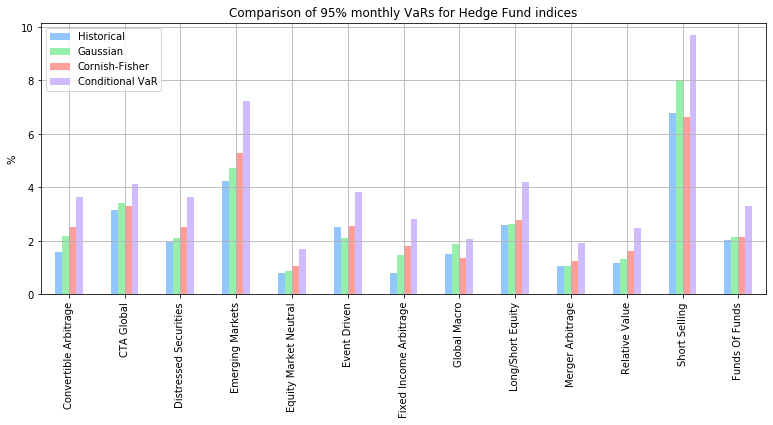

In [28]:
comparevars = pd.concat([erk.var_historic(hfi), erk.var_gaussian(hfi), erk.var_gaussian(hfi,modified=True), erk.cvar_historic(hfi)], axis=1)
comparevars.columns = ["Historical","Gaussian","Cornish-Fisher","Conditional VaR"]
(comparevars * 100).plot.bar(figsize=(13,5), grid=True, title="Comparison of 95% monthly VaRs for Hedge Fund indices")
plt.ylabel("%")
plt.show()